# Classification des types de diabètes

## Objectifs:

### Nous essayons de construire un modèle qui prédit le diabète chez les patients.


In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model

from sklearn.linear_model import LogisticRegression
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score,  recall_score, precision_score, RocCurveDisplay, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2 , f_classif

from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.feature_selection import RFE
warnings.filterwarnings('ignore')

**Chargement des données**

In [3]:
data = pd.read_csv('data/data_train_diabetes_health_indicators.csv')
test_data = pd.read_csv('data/date_validation_diabetes_health_indicators.csv')

# Analyse exploratoire des données (EDA)

In [4]:
data.head()

,Unnamed: 0,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,111866,2,1,1.0,1,32.0,1.0,0.0,1.0,1,...,1,0.0,2.0,15.0,0.0,0.0,1,7,6.0,6.0
1,206199,0,0,1.0,1,28.0,0.0,0.0,0.0,0,...,1,0.0,4.0,4.0,30.0,0.0,0,10,6.0,7.0
2,144211,0,0,1.0,1,24.0,1.0,0.0,0.0,1,...,1,0.0,2.0,0.0,0.0,0.0,0,12,5.0,6.0
3,89872,2,1,1.0,1,38.0,0.0,0.0,0.0,1,...,1,0.0,3.0,0.0,0.0,0.0,1,7,6.0,8.0
4,34953,0,0,1.0,1,30.0,0.0,0.0,0.0,0,...,0,1.0,4.0,10.0,0.0,0.0,0,5,3.0,7.0


drop first column (useless)

In [5]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
data.shape

(47276, 22)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47276 entries, 0 to 47275
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_012          47276 non-null  int64  
 1   HighBP                47276 non-null  int64  
 2   HighChol              47276 non-null  float64
 3   CholCheck             47276 non-null  int64  
 4   BMI                   47276 non-null  float64
 5   Smoker                47276 non-null  float64
 6   Stroke                47276 non-null  float64
 7   HeartDiseaseorAttack  47276 non-null  float64
 8   PhysActivity          47276 non-null  int64  
 9   Fruits                47276 non-null  int64  
 10  Veggies               47276 non-null  int64  
 11  HvyAlcoholConsump     47276 non-null  int64  
 12  AnyHealthcare         47276 non-null  int64  
 13  NoDocbcCost           47276 non-null  float64
 14  GenHlth               47276 non-null  float64
 15  MentHlth           

In [ ]:
data.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [ ]:
data.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,...,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000
mean,0.305800,0.419325,0.401980,0.964337,28.939081,0.408114,0.038265,0.085752,0.781284,0.619807,...,0.962899,0.062696,2.473560,3.929245,3.761126,0.152720,0.476986,7.887829,5.142482,6.931191
std,0.703757,0.493454,0.490303,0.185450,6.562661,0.491490,0.191837,0.280000,0.413380,0.485439,...,0.189012,0.242417,1.027017,7.861948,8.239428,0.359721,0.499475,3.227736,0.945945,2.376979
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,28.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,4.000000,2.000000,0.000000,1.000000,10.000000,6.000000,9.000000
max,2.000000,1.000000,1.000000,1.000000,95.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,11.000000


Il n'y a pas de données manquantes

In [6]:
data.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

Il y a 768 lignes dupliquées, elles doivent donc être supprimées.

In [ ]:
data.duplicated().sum()

768

In [7]:
data.drop_duplicates(inplace=True)

In [ ]:
data.shape

(46508, 22)

<Axes: >

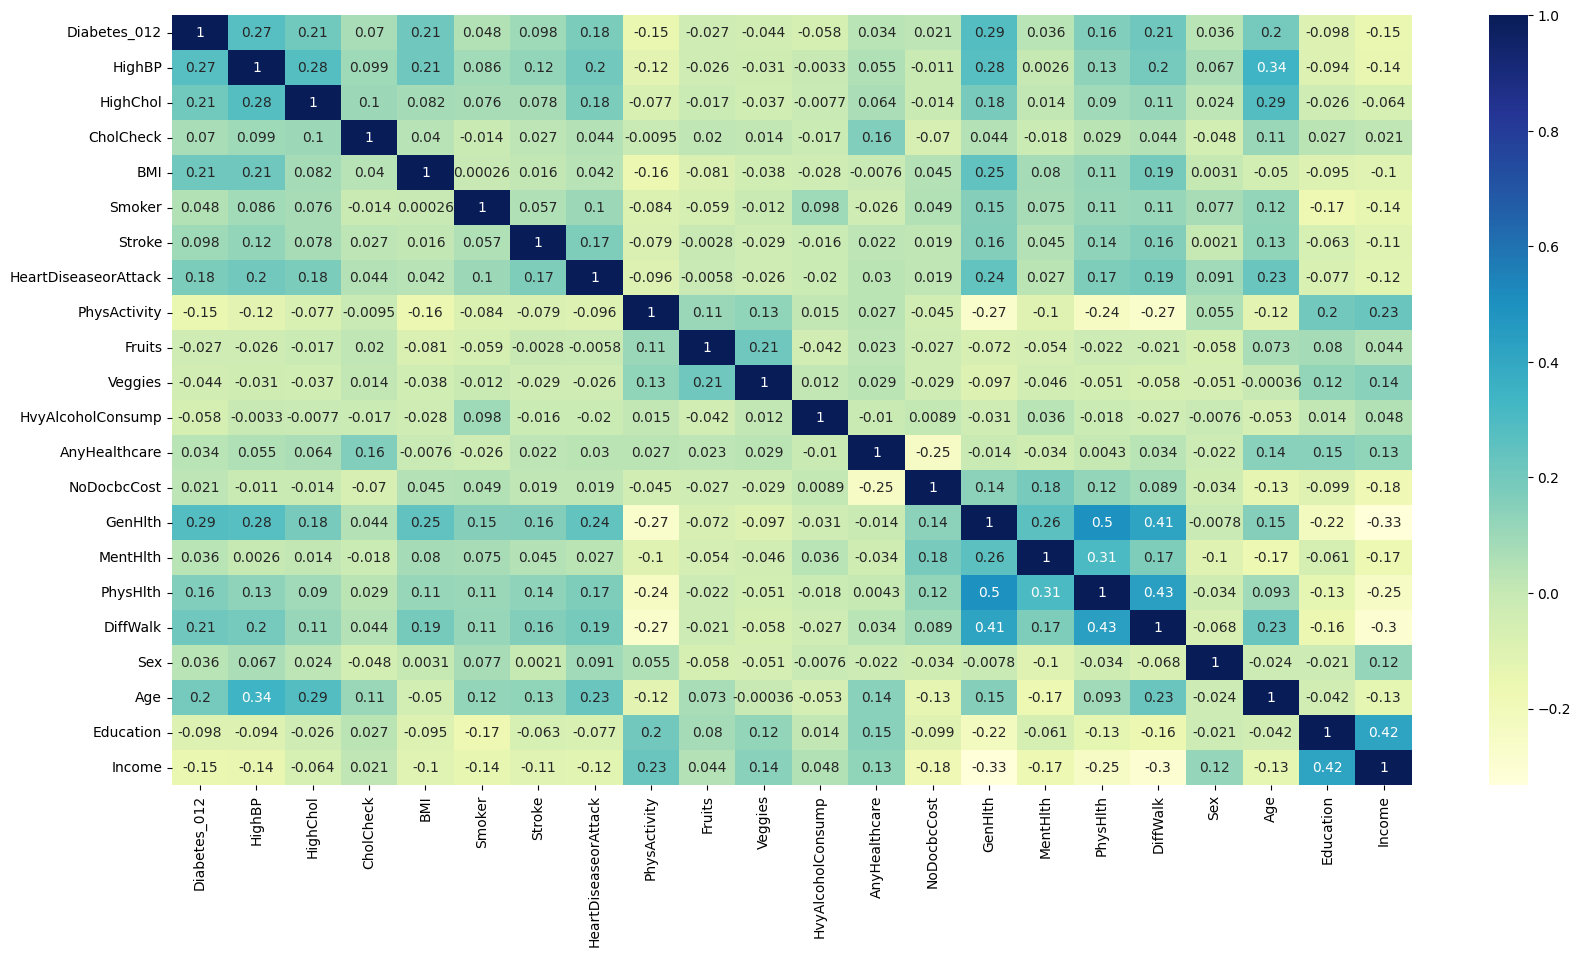

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

In [8]:
df_vis=data.copy()

## Visualisation


In [9]:
unique_values = {}
for col in df_vis.columns:
    unique_values[col] = df_vis[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
Diabetes_012,3
HighBP,2
HighChol,2
CholCheck,2
BMI,74
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2


## Ratio des diabètes dans l'ensemble de données avec leurs types


In [10]:
data['Diabetes_012'].value_counts()

0    38743
2     6687
1     1078
Name: Diabetes_012, dtype: int64

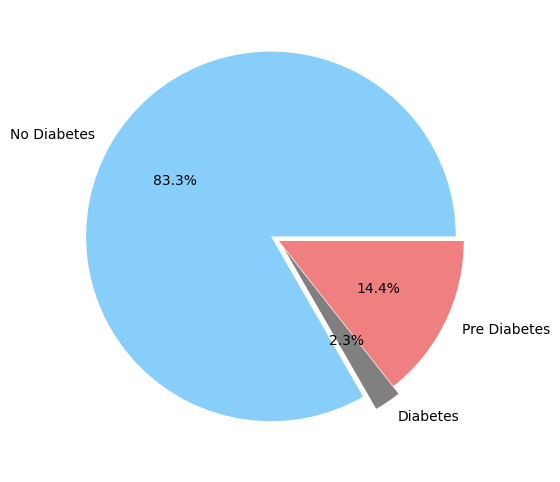

In [11]:
# pie plot of diabetes ratio
plt.figure(figsize=(8,6))
labels = ['No Diabetes', 'Diabetes', 'Pre Diabetes']
sizes = [data['Diabetes_012'].value_counts()[0], data['Diabetes_012'].value_counts()[1], data['Diabetes_012'].value_counts()[2]]
colors = ['lightskyblue', 'grey', 'lightcoral']
explode = (0.05, 0.05, 0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, autopct='%.1f%%', colors=colors, data = data);



#### "Pas de diabète" est le cas le plus courant dans l'ensemble des données, suivi par "diabète" et "pré-diabète".



## corrélation avec le diabète_012 à l'aide d'un graphique à barres

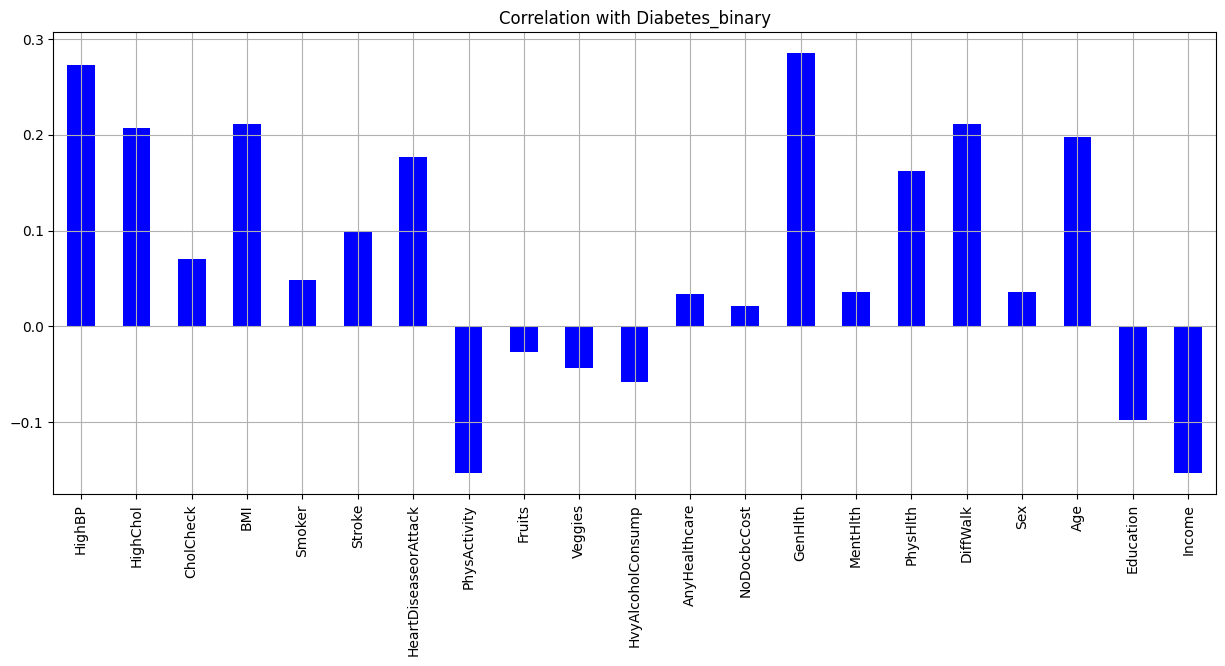

In [ ]:
data.drop('Diabetes_012', axis=1).corrwith(data.Diabetes_012).plot(kind='bar', grid=True, figsize=(15, 6)
, title="Correlation with Diabetes_binary",color="blue");

1. Fruits , AnyHealthcare , NoDocbccost and sex sont les moins corrélés avec Diabetes_binary.

2. HighBP , HighChol , BMI , smoker , stroke , HeartDiseaseorAttack , PhysActivity , Veggies , HvyAlcoholconsump , GenHlth , PhysHlth , Age , Education , Income and DiffWalk ont une corrélation significative avec le diabète_012.

# Preprocessing

[Text(0, 0, 'Diabetes_012'),
 Text(1, 0, 'HighBP'),
 Text(2, 0, 'HighChol'),
 Text(3, 0, 'CholCheck'),
 Text(4, 0, 'BMI'),
 Text(5, 0, 'Smoker'),
 Text(6, 0, 'Stroke'),
 Text(7, 0, 'HeartDiseaseorAttack'),
 Text(8, 0, 'PhysActivity'),
 Text(9, 0, 'Fruits'),
 Text(10, 0, 'Veggies'),
 Text(11, 0, 'HvyAlcoholConsump'),
 Text(12, 0, 'AnyHealthcare'),
 Text(13, 0, 'NoDocbcCost'),
 Text(14, 0, 'GenHlth'),
 Text(15, 0, 'MentHlth'),
 Text(16, 0, 'PhysHlth'),
 Text(17, 0, 'DiffWalk'),
 Text(18, 0, 'Sex'),
 Text(19, 0, 'Age'),
 Text(20, 0, 'Education'),
 Text(21, 0, 'Income')]

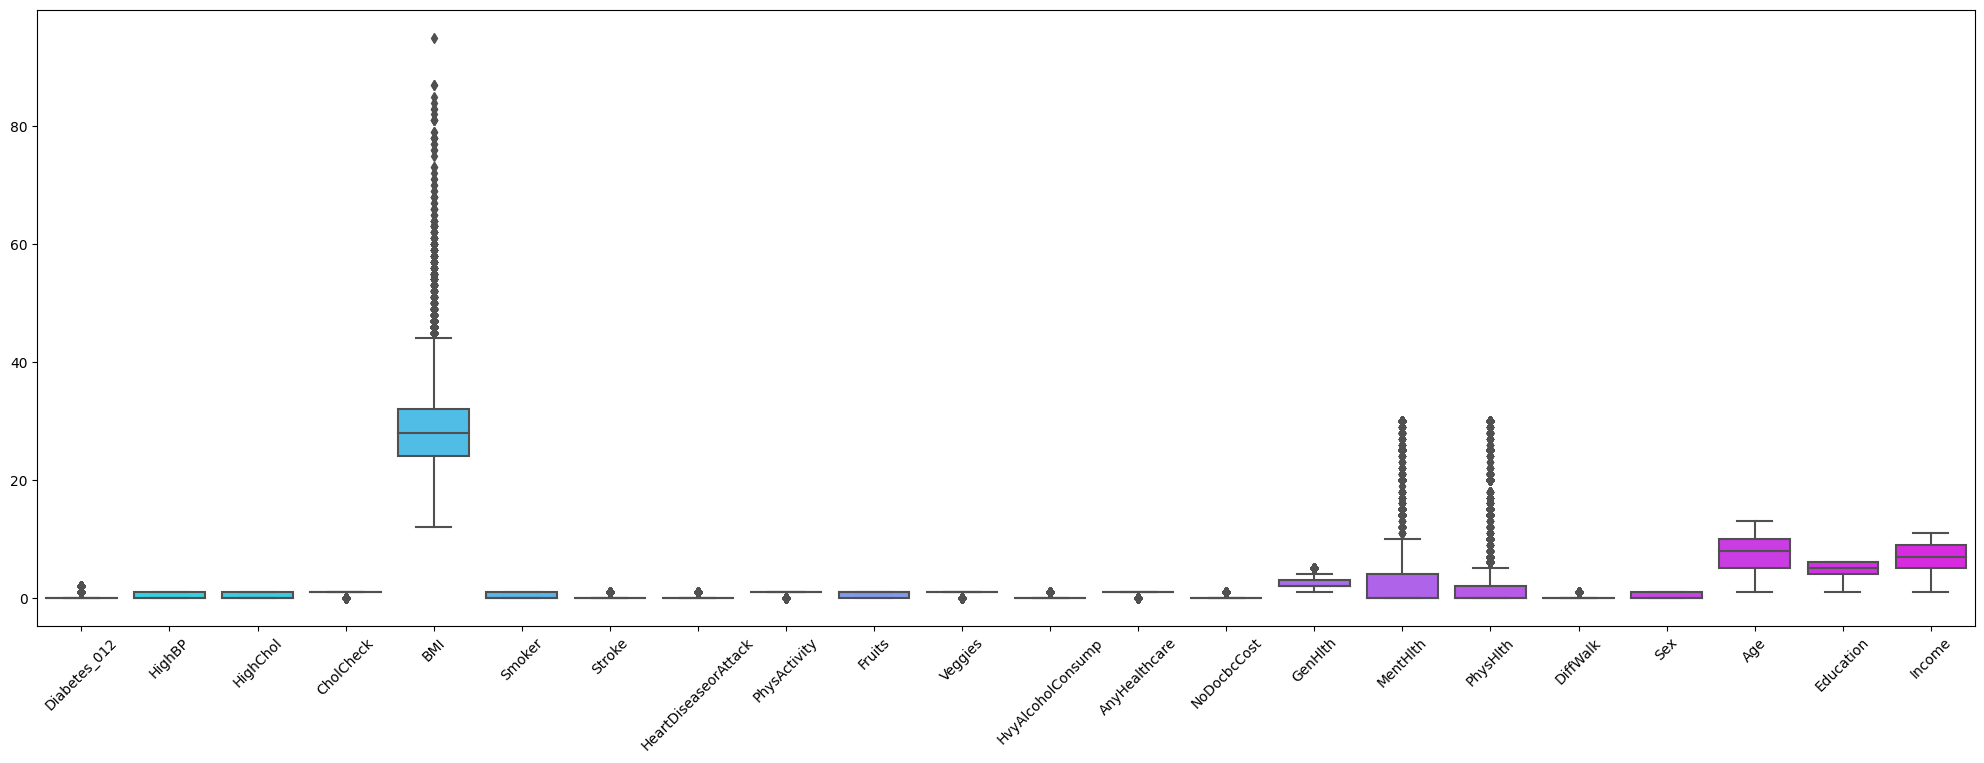

In [12]:
plt.figure(figsize = (25,8))
u = sns.boxplot(palette = 'cool', data=data)
u.set_xticklabels(u.get_xticklabels(),rotation=45)

il y a des valeurs aberrantes dans l'BMI

> Indented block



In [13]:
data.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

### traiter les valeurs aberrantes de l'BMI

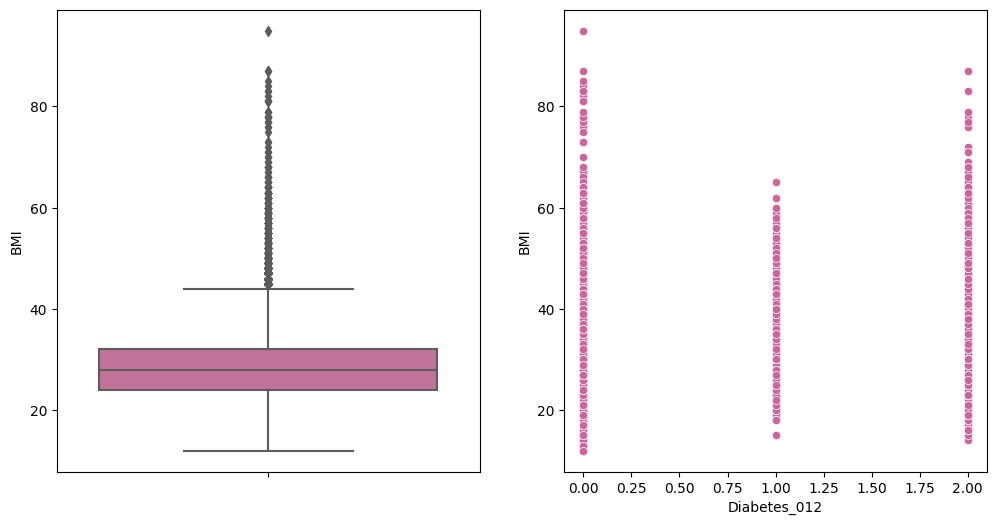

In [15]:
plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
sns.boxplot(data=data,y='BMI',color='#cc6699')
plt.subplot(1, 2, 2)
sns.scatterplot(data=data,x='Diabetes_012',y='BMI',color='#cc6699')
plt.show()

In [16]:
x=data[data['BMI']>=70]
x.shape

(31, 22)

In [17]:
df=data.copy()

In [18]:
df=data[data['BMI']<70]

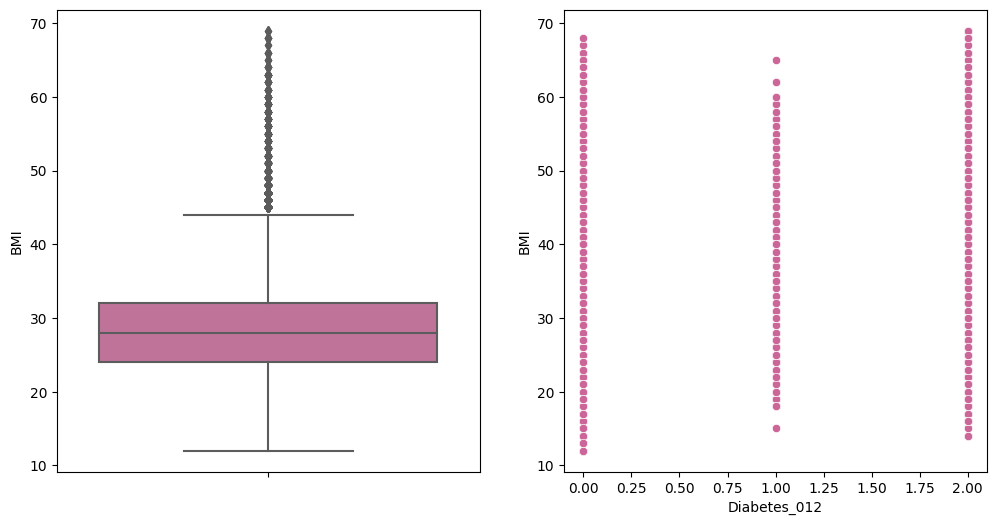

In [19]:
plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df,y='BMI',color='#cc6699')
plt.subplot(1, 2, 2)
sns.scatterplot(data=df,x='Diabetes_012',y='BMI',color='#cc6699')
plt.show()

In [20]:
df['Diabetes_012'].value_counts()

0    38721
2     6678
1     1078
Name: Diabetes_012, dtype: int64

# Diviser les données

In [21]:
test_data.head()

,Unnamed: 0,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,111866,2,1,1.0,1,32.0,1.0,0.0,1.0,1,...,1,0.0,2.0,15.0,0.0,0.0,1,7,6.0,6.0
1,206199,0,0,1.0,1,28.0,0.0,0.0,0.0,0,...,1,0.0,4.0,4.0,30.0,0.0,0,10,6.0,7.0
2,144211,0,0,1.0,1,24.0,1.0,0.0,0.0,1,...,1,0.0,2.0,0.0,0.0,0.0,0,12,5.0,6.0
3,89872,2,1,1.0,1,38.0,0.0,0.0,0.0,1,...,1,0.0,3.0,0.0,0.0,0.0,1,7,6.0,8.0
4,34953,0,0,1.0,1,30.0,0.0,0.0,0.0,0,...,0,1.0,4.0,10.0,0.0,0.0,0,5,3.0,7.0


In [22]:
test_data.drop('Unnamed: 0', axis = 1, inplace = True)

In [23]:
y_train = df['Diabetes_012']
x_train = df.drop(['Diabetes_012'], axis=1)
y_test = test_data['Diabetes_012']
x_test = test_data.drop(['Diabetes_012'], axis = 1)

## Resampling

In [24]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(x_train, y_train)

# Modeling

 *XGB* Classifier

In [25]:
xgb= XGBClassifier(max_depth=10)
xgb.fit(X_res, y_res)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [26]:
print(xgb.score(X_res, y_res))
print(xgb.score(x_test, y_test))

0.9840310598038963
0.9640409510110839


In [27]:
y_pred_train_xgb = xgb.predict(X_res)
acc_train_xgb = accuracy_score(y_res, y_pred_train_xgb)

y_pred_test_xgb = xgb.predict(x_test)
acc_test_xgb = accuracy_score(y_test, y_pred_test_xgb)
print(acc_train_xgb)
print(acc_test_xgb)

0.9840310598038963
0.9640409510110839


In [28]:
print(classification_report(y_test, y_pred_test_xgb))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      9855
           1       0.98      0.77      0.86       263
           2       0.97      0.81      0.88      1701

    accuracy                           0.96     11819
   macro avg       0.97      0.86      0.91     11819
weighted avg       0.96      0.96      0.96     11819



In [29]:
print('Precision: %.3f' % precision_score(y_test, y_pred_test_xgb,average="micro"))
print('Recall: %.3f' % recall_score(y_test, y_pred_test_xgb,average="micro"))
print('F-measure: %.3f' % f1_score(y_test, y_pred_test_xgb,average="micro"))

Precision: 0.964
Recall: 0.964
F-measure: 0.964


In [30]:
y_pred_prob_xgb = xgb.predict_proba(x_test)
roc_auc_score_xgb = roc_auc_score(y_test, y_pred_prob_xgb, multi_class="ovr")
print('ROC AUC Score:',roc_auc_score_xgb)

ROC AUC Score: 0.9941278630683005


In [37]:
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier()

# Define the parameter grid to search
param_grid = {
    'max_depth': [5, 10,],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='f1_micro',verbose=2)
grid_search.fit(X_res,y_res)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ...learning_rate=0.01, max_depth=5, n_estimators=50; total time=   7.8s
[CV] END ...learning_rate=0.01, max_depth=5, n_estimators=50; total time=   2.2s
[CV] END ...learning_rate=0.01, max_depth=5, n_estimators=50; total time=   2.3s
[CV] END ...learning_rate=0.01, max_depth=5, n_estimators=50; total time=   4.7s
[CV] END ...learning_rate=0.01, max_depth=5, n_estimators=50; total time=   2.3s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   4.2s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   6.8s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   4.2s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   4.3s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   6.5s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=200; total time=  10.6s
[CV] END ..learning_rate=0.01, max_depth=5, n_es

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [5, 10], 'n_estimators': [50, 100, 200]},
             scoring='f1_micro', verbose=2)

In [38]:
grid_search.best_params_

{'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 200}

In [42]:
import pickle

# Supposons que 'best_model' est ton meilleur modèle obtenu après GridSearchCV
best_model = grid_search.best_estimator_

# Sauvegarder le modèle dans un fichier avec pickle
with open('modele_xgb.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)

In [40]:
y_pred_best_model=grid_search.predict(x_test)
print(classification_report(y_test, y_pred_best_model))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      9855
           1       0.99      0.90      0.94       263
           2       0.99      0.86      0.92      1701

    accuracy                           0.97     11819
   macro avg       0.98      0.92      0.95     11819
weighted avg       0.98      0.97      0.97     11819

